In [28]:
#Make sure to install xlrd 1.2:   pip install xlrd==1.2.0
import xlrd
import pandas as pd
import numpy as np
from scipy import stats
from random import randrange
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.mlab as mlab
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
file = ('/Users/alfaro/Documents/pythoncode/master/metodoscuantitativos/Project2PartA_StockData.xlsx')

In [3]:
df1 = pd.read_excel(file, sheet_name='DailyStockData')
new_header = df1.iloc[0]
df1 = df1[2:]
df1.columns = new_header
df1.columns = df1.columns.fillna('to_drop')
df1.drop('to_drop', axis = 1, inplace = True)
df1.rename(columns={"Ticker": "Date"})

,TIcker,MSFT,KO,PEP,AAPL,GIS,HRL,SHW,TGT,GWW,NWL,T,MAN,ADBE,SBUX,CNX,GS,GNW
2,20170103,0.007081,0.008201,-0.003695,-0.000227,0.014795,-0.000264,0.011441,0.012305,0.009159,0.005271,0.006914,-0.007966,-0.006181,0.000932,-0.015408,0.003672,0.001488
3,20170104,-0.004474,-0.003588,-0.003054,-0.009312,-0.001286,-0.001409,0.015082,0.007561,0.001009,0.015474,0.003462,0.020552,-0.00812,0.00968,0.005589,0.023079,0.010398
4,20170105,0,0.002401,-0.002407,-0.00917,-0.010949,0.007846,-0.005701,-0.00133,0.005373,0.007997,-0.000848,0.003512,0.001742,-0.013274,-0.002446,-0.004952,0.012055
5,20170106,0.008668,-0.000239,0.001755,0.004859,-0.008465,-0.0014,0.001129,0.02359,-0.004175,0.006122,-0.009283,0.006733,-0.015823,0.002429,0.002229,0.001659,-0.005229
6,20170109,-0.003183,-0.010062,-0.003722,0.006677,0.003722,-0.007271,-0.004773,-0.020723,-0.001761,-0.031727,0.010912,0.008889,-0.012014,0,0.005559,0.001104,0.003213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,20181224,-0.041739,-0.033845,-0.004287,0.000811,0.010013,0.0012,0.010145,0.007715,0.009665,-0.002883,-0.035851,0.003172,-0.006043,0.011894,0.011047,0.010175,-0.009019
500,20181226,0.06831,0.021323,0.002756,-0.014226,-0.003652,-0.005289,0.003214,0.003466,0.005181,0.005964,-0.029445,0.002259,-0.00029,0.003712,-0.006829,-0.000824,0.003114
501,20181227,0.006166,0.012569,0.006355,-0.013518,0.007244,0.00553,0.00818,-0.002681,-0.000322,-0.008264,-0.012447,0.002028,0.004634,0.016333,-0.006876,0.00043,-0.002029
502,20181228,-0.007808,-0.006943,0.00128,0.011667,-0.012305,-0.004442,-0.002043,-0.009098,0.0029,0.015761,-0.004529,-0.010121,0.007207,0.003032,0,0.017499,-0.005652


In [4]:
df2 = pd.read_excel(file, sheet_name='SP500IndexDataMonthly')
del df2['Obs #']
df2

,Calendar Date,Return on the S&P 500 Index
0,20010131,0.034637
1,20010228,-0.092291
2,20010330,-0.064205
3,20010430,0.076814
4,20010531,0.005090
...,...,...
211,20180831,0.030263
212,20180928,0.004294
213,20181031,-0.069403
214,20181130,0.017859


In [5]:
df3 = pd.read_excel(file, sheet_name='StockMonthlyData')
new_header = df3.iloc[0]
df3 = df3[2:]
df3.columns = new_header
df3.columns = df3.columns.fillna('to_drop')
df3.drop('to_drop', axis = 1, inplace = True)
#df3.rename(columns={"Ticker": "Date"})
df3

,Ticker,MSFT,KO,PEP,AAPL,GIS,HRL,SHW,TGT,GWW,NWL,T,MAN,ADBE,SBUX,CNX,GS,GNW
2,20070131,0.03349,-0.007668,0.043006,0.01049,0.000174,0.019014,0.08682,0.075548,0.110237,0.02038,0.062518,-0.026692,-0.054718,-0.013552,0.071584,0.066015,0.0228
3,20070228,-0.083927,-0.025063,-0.032036,-0.013064,-0.016073,-0.037203,-0.032344,0.004726,-0.000901,0.043331,-0.022057,0.018785,0.009776,-0.115627,0.038339,-0.049067,0.012321
4,20070330,-0.01065,0.035561,0.011243,0.098097,0.033736,0.019183,-0.007663,-0.036893,-0.000647,0.015681,0.071467,-0.007133,0.06242,0.014887,0.096693,0.024188,-0.011039
5,20070430,0.074273,0.087292,0.039805,0.074158,0.035211,0.028233,-0.034373,0.001856,0.069653,-0.013509,-0.009003,0.087841,-0.003357,-0.010842,0.070023,0.059672,0.046938
6,20070531,0.028393,0.015329,0.033893,0.214339,0.022371,-0.016802,0.065626,0.053562,0.069959,0.042713,0.067665,0.146417,0.060156,-0.071244,0.162169,0.055853,-0.010688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,20180831,0.062877,-0.044178,-0.026,0.200063,-0.001086,0.088407,0.035645,0.092464,0.025594,-0.161894,-0.000938,0.00504,0.076958,0.027104,-0.020885,0.00497,0.01087
142,20180928,0.018161,0.045098,0.006406,-0.008303,-0.067159,0.006386,-0.000812,0.008114,0.009433,-0.065378,0.051346,-0.082898,0.024439,0.063424,-0.102258,-0.057062,-0.103226
143,20181031,-0.066101,0.036588,0.005188,-0.030478,0.03192,0.112373,-0.13563,-0.051922,-0.205478,-0.217734,-0.071471,-0.112494,-0.089609,0.025158,0.093641,0.005039,0.026379
144,20181130,0.042505,0.060777,0.085069,-0.180709,-0.034018,0.033226,0.079955,-0.143848,0.110681,0.488035,0.018253,0.077336,0.020874,0.151193,-0.115655,-0.150331,0.088785


In [24]:
df4 = pd.read_excel(file, sheet_name='ExpectedNormal')
new_header = df4.iloc[0]
#df4 = df4[3:]
#df4.columns = new_header
#df4.columns = df4.columns.fillna('to_drop')
#df4.drop('to_drop', axis = 1, inplace = True)
df4 = df4.drop(18)
#df3.rename(columns={"Ticker": "Date"})
df4.iloc[:,3]

0      0.015899
1      0.100881
2      0.560869
3      2.439603
4      8.303314
5     22.116649
6     46.107722
7     75.240907
8     96.114156
9     96.114156
10    75.240907
11    46.107722
12    22.116649
13     8.303314
14     2.439603
15     0.560869
16     0.100881
17     0.014193
Name: Expected n=502, dtype: float64

In [8]:
stock='msft'.upper()
df1_distance_to_std = df1[stock] / df1[stock].astype(float).std()
pd.cut(df1_distance_to_std, np.arange(-4.5,5,0.5)).value_counts()

#this line do the same as previo.
#df1_distance_to_std.value_counts(bins=np.linspace(-4.5, 4.5, num=19))

(0.0, 0.5]      139
(-0.5, 0.0]     128
(0.5, 1.0]       85
(-1.0, -0.5]     49
(1.0, 1.5]       29
(-1.5, -1.0]     20
(-2.5, -2.0]     10
(-2.0, -1.5]     10
(1.5, 2.0]       10
(2.0, 2.5]        6
(2.5, 3.0]        4
(-3.0, -2.5]      4
(-4.0, -3.5]      3
(4.0, 4.5]        1
(-3.5, -3.0]      1
(3.0, 3.5]        0
(3.5, 4.0]        0
(-4.5, -4.0]      0
Name: MSFT, dtype: int64

In [9]:
df1[stock].astype(float).describe()

count    502.000000
mean       0.001158
std        0.014199
min       -0.054338
25%       -0.004650
50%        0.001430
75%        0.007848
max        0.075705
Name: MSFT, dtype: float64

In [10]:
pd.cut(df1[stock], np.arange(-4.5,5,0.5)*df1[stock].astype(float).std()).value_counts()

(0.0, 0.0071]         139
(-0.0071, 0.0]        128
(0.0071, 0.0142]       85
(-0.0142, -0.0071]     49
(0.0142, 0.0213]       29
(-0.0213, -0.0142]     20
(-0.0355, -0.0284]     10
(-0.0284, -0.0213]     10
(0.0213, 0.0284]       10
(0.0284, 0.0355]        6
(0.0355, 0.0426]        4
(-0.0426, -0.0355]      4
(-0.0568, -0.0497]      3
(0.0568, 0.0639]        1
(-0.0497, -0.0426]      1
(0.0426, 0.0497]        0
(0.0497, 0.0568]        0
(-0.0639, -0.0568]      0
Name: MSFT, dtype: int64

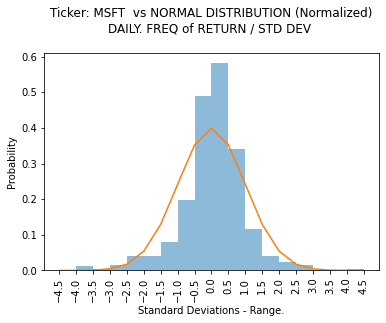

In [72]:
ax1_1 = df1_distance_to_std.plot(kind='hist', bins=np.linspace(-4.5, 4.5, num=19), alpha=0.5, density=True)
plt.title('Ticker: {}  vs NORMAL DISTRIBUTION (Normalized)\nDAILY. FREQ of RETURN / STD DEV \n'.format(stock))
plt.xticks(rotation='vertical')
plt.xlabel('Standard Deviations - Range.')
plt.ylabel('Probability')
ax1_1.xaxis.set_major_locator(plt.MultipleLocator(0.5))
mu, sigma = stats.norm.fit(df1[stock].astype(float))
best_fit_line = stats.norm.pdf(19, mu, sigma)
plt.plot(np.linspace(-4.5, 4.5, num=19), norm.pdf(np.linspace(-4.5, 4.5, num=19),0,1))
#plt.plot(np.linspace(-4.5, 4.5, num=19), best_fit_line )

<AxesSubplot:title={'center':'Ticker: MSFT \nDAILY. FREQ of RETURN / STD DEV \n'}, xlabel='Standard Deviations - Range', ylabel='Frequency'>

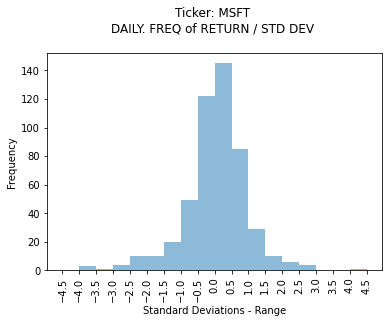

In [48]:
#pd.cut(df1[stock], np.arange(-4.5,5,0.5)).value_counts()
#np.arange(-4.5,5,0.5)*df1[stock].astype(float).std()
ax1 = df1_distance_to_std.plot.hist(bins=np.linspace(-4.5, 4.5, num=19), alpha=0.5)
ax1.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#plt.plot(df1_distance_to_std, stats.norm.pdf(df1_distance_to_std.tolist(), df1_distance_to_std.mean(), 1))
#plt.hist(df4.iloc[:,3],histtype='step')
plt.title('Ticker: {} \nDAILY. FREQ of RETURN / STD DEV \n'.format(stock))
plt.xticks(rotation='vertical')
plt.xlabel('Standard Deviations - Range')

ax1

In [12]:
#df2.iloc[:,1]
df1_distance_to_std.value_counts(bins=np.linspace(-4.5, 4.5, num=19))

(0.0, 0.5]        139
(-0.5, 0.0]       128
(0.5, 1.0]         85
(-1.0, -0.5]       49
(1.0, 1.5]         29
(-1.5, -1.0]       20
(-2.5, -2.0]       10
(-2.0, -1.5]       10
(1.5, 2.0]         10
(2.0, 2.5]          6
(2.5, 3.0]          4
(-3.0, -2.5]        4
(-4.0, -3.5]        3
(4.0, 4.5]          1
(-3.5, -3.0]        1
(3.0, 3.5]          0
(3.5, 4.0]          0
(-4.501, -4.0]      0
Name: MSFT, dtype: int64

In [13]:
df2.iloc[:,1].describe()

count    216.000000
mean       0.003846
std        0.041515
min       -0.169425
25%       -0.017430
50%        0.009227
75%        0.028823
max        0.107723
Name: Return on the S&P 500 Index, dtype: float64

In [14]:
df2_distance_to_std = df2.iloc[:,1] / df2.iloc[:,1].astype(float).std()
pd.cut(df2_distance_to_std, np.arange(-4.5,5,0.5)).value_counts()

(0.0, 0.5]      65
(0.5, 1.0]      41
(-0.5, 0.0]     36
(-1.0, -0.5]    18
(1.0, 1.5]      16
(-2.0, -1.5]    11
(1.5, 2.0]       8
(-1.5, -1.0]     8
(-2.5, -2.0]     5
(2.0, 2.5]       4
(-3.0, -2.5]     2
(2.5, 3.0]       1
(-4.5, -4.0]     1
(-4.0, -3.5]     0
(-3.5, -3.0]     0
(3.0, 3.5]       0
(3.5, 4.0]       0
(4.0, 4.5]       0
Name: Return on the S&P 500 Index, dtype: int64

In [22]:
pd.cut(df2.iloc[:,1], np.arange(-4.5,5,0.5)*df2.iloc[:,1].astype(float).std()).value_counts()

(0.0, 0.0208]         65
(0.0208, 0.0415]      41
(-0.0208, 0.0]        36
(-0.0415, -0.0208]    18
(0.0415, 0.0623]      16
(-0.083, -0.0623]     11
(0.0623, 0.083]        8
(-0.0623, -0.0415]     8
(-0.104, -0.083]       5
(0.083, 0.104]         4
(-0.125, -0.104]       2
(0.104, 0.125]         1
(-0.187, -0.166]       1
(-0.166, -0.145]       0
(-0.145, -0.125]       0
(0.125, 0.145]         0
(0.145, 0.166]         0
(0.166, 0.187]         0
Name: Return on the S&P 500 Index, dtype: int64

<AxesSubplot:title={'center':'S&P \nMONTHLY. FREQ of RETURN / STD DEV \n'}, xlabel='Standard Deviations - Range', ylabel='Frequency'>

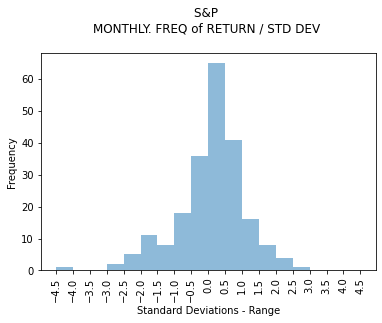

In [15]:
ax2 = df2_distance_to_std.plot.hist(bins=np.linspace(-4.5, 4.5, num=19), alpha=0.5)
ax2.xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.title('S&P \nMONTHLY. FREQ of RETURN / STD DEV \n'.format(stock))
plt.xlabel('Standard Deviations - Range')
plt.xticks(rotation='vertical')
ax2

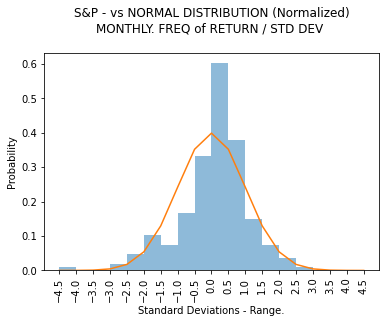

In [73]:
ax2_1 = df2_distance_to_std.plot(kind='hist', bins=np.linspace(-4.5, 4.5, num=19), alpha=0.5, density=True)
plt.title('S&P - vs NORMAL DISTRIBUTION (Normalized)\nMONTHLY. FREQ of RETURN / STD DEV \n'.format(stock))
plt.xticks(rotation='vertical')
plt.xlabel('Standard Deviations - Range.')
plt.ylabel('Probability')
ax2_1.xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.plot(np.linspace(-4.5, 4.5, num=19), norm.pdf(np.linspace(-4.5, 4.5, num=19),0,1))

In [16]:
df3[stock].astype(float).describe()

count    144.000000
mean       0.012810
std        0.068665
min       -0.163357
25%       -0.029257
50%        0.019192
75%        0.053640
max        0.249491
Name: MSFT, dtype: float64

In [17]:
df3_distance_to_std = df3[stock] / df3[stock].astype(float).std()
pd.cut(df3_distance_to_std, np.arange(-4.5,5,0.5)).value_counts()

(0.0, 0.5]      33
(0.5, 1.0]      28
(-0.5, 0.0]     25
(-1.0, -0.5]    16
(-1.5, -1.0]    12
(1.0, 1.5]      12
(1.5, 2.0]       5
(2.0, 2.5]       4
(-2.5, -2.0]     3
(-2.0, -1.5]     3
(2.5, 3.0]       2
(3.5, 4.0]       1
(3.0, 3.5]       0
(-4.5, -4.0]     0
(-4.0, -3.5]     0
(-3.0, -2.5]     0
(-3.5, -3.0]     0
(4.0, 4.5]       0
Name: MSFT, dtype: int64

<AxesSubplot:title={'center':'Ticker: MSFT \nMONTHLY. FREQ of RETURN / STD DEV \n'}, xlabel='Standard Deviations - Range', ylabel='Frequency'>

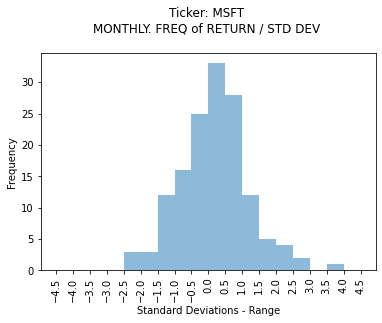

In [18]:
ax3 = df3_distance_to_std.plot.hist(bins=np.linspace(-4.5, 4.5, num=19), alpha=0.5)
ax3.xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.title('Ticker: {} \nMONTHLY. FREQ of RETURN / STD DEV \n'.format(stock))
plt.xlabel('Standard Deviations - Range')
plt.xticks(rotation='vertical')
ax3

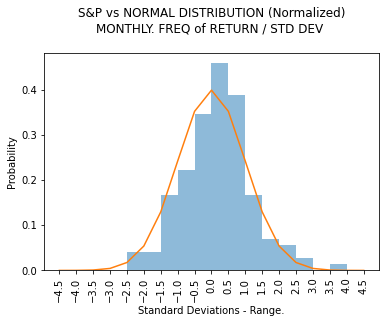

In [74]:
ax3_1 = df3_distance_to_std.plot(kind='hist', bins=np.linspace(-4.5, 4.5, num=19), alpha=0.5, density=True)
plt.title('S&P vs NORMAL DISTRIBUTION (Normalized)\nMONTHLY. FREQ of RETURN / STD DEV \n'.format(stock))
plt.xticks(rotation='vertical')
plt.xlabel('Standard Deviations - Range.')
plt.ylabel('Probability')
ax3_1.xaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.plot(np.linspace(-4.5, 4.5, num=19), norm.pdf(np.linspace(-4.5, 4.5, num=19),0,1))

In [20]:
pd.cut(df3[stock], np.arange(-4.5,5,0.5)*df3[stock].astype(float).std()).value_counts()

(0.0, 0.0343]         33
(0.0343, 0.0687]      28
(-0.0343, 0.0]        25
(-0.0687, -0.0343]    16
(-0.103, -0.0687]     12
(0.0687, 0.103]       12
(0.103, 0.137]         5
(0.137, 0.172]         4
(-0.172, -0.137]       3
(-0.137, -0.103]       3
(0.172, 0.206]         2
(0.24, 0.275]          1
(0.206, 0.24]          0
(-0.309, -0.275]       0
(-0.275, -0.24]        0
(-0.206, -0.172]       0
(-0.24, -0.206]        0
(0.275, 0.309]         0
Name: MSFT, dtype: int64